# Directing customers to subscription through app behavior analysis

- user: User ID
- first_open: The date the user opens the app for the first time
- dayofweek: Day of week in numerical numbers
    - 0: Sunday 
    - 1: Monday
    - 2: Tuesday
    - 3: Wednesday
    - 4: Thursday
    - 5: Friday
    - 6: Saturday
- hour: Hour of when the user opened the app for the first time
- age: Age of the user
- screen_list: Every screen the user visited in the first 24 hours
- numscreens: The number of screens in screen_list column
- minigame: In this app, there is a mini game users can choose to play
    - 0: The user did not play the mini game in the frst 24 hours
    - 1: The user played the mini game in the frst 24 hours
- used_premium_feature:
    - 0: The user did not use the premium feature
    - 1: The user used the premium feature
- enrolled: The terget feature of this project
    - 0: The user did not purchase payed products after the free trial
    - 1: The user purchased payed products after the free trial
- enrolled_date: The date and time when the user purchased the payed product, if they did
- liked: The app has "like" button in each page and users can hit it if they liked some feature
    - 0: The user did not liked any feature
    - 1: The user hit like-buttons for some feature

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df_app = pd.read_csv('appdata10.csv')

## Exploratory Data Analysis

In [16]:
df_app.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [17]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [18]:
df_app.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df_app['user'].nunique()

49874

In [20]:
df_app['enrolled'].value_counts()

1    31074
0    18926
Name: enrolled, dtype: int64

In [21]:
df_app['minigame'].value_counts()

0    44609
1     5391
Name: minigame, dtype: int64

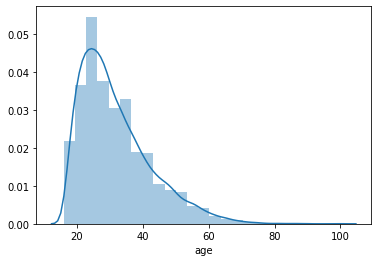

In [22]:
sns.distplot(df_app['age'], bins=25)

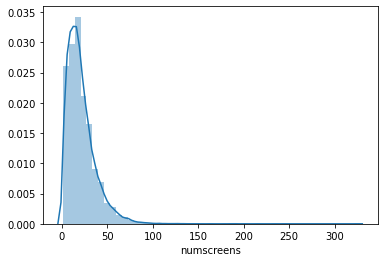

In [23]:
sns.distplot(df_app['numscreens'])

In [24]:
enrolled = df_app[df_app['enrolled'] == 1]
not_enrolled = df_app[df_app['enrolled'] == 0]

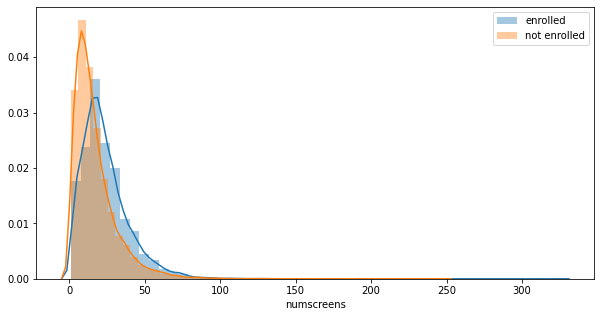

In [25]:
plt.figure(figsize=(10,5))
sns.distplot(enrolled['numscreens'], label='enrolled')
sns.distplot(not_enrolled['numscreens'], label='not enrolled')
plt.legend()

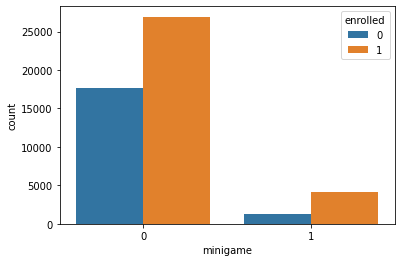

In [26]:
sns.countplot(x='minigame', data=df_app, hue='enrolled')

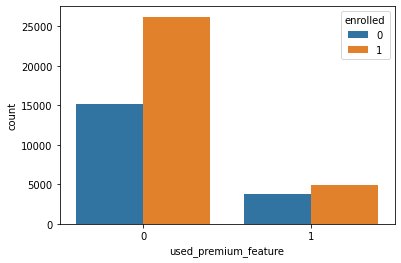

In [27]:
sns.countplot(x='used_premium_feature', data=df_app, hue='enrolled')

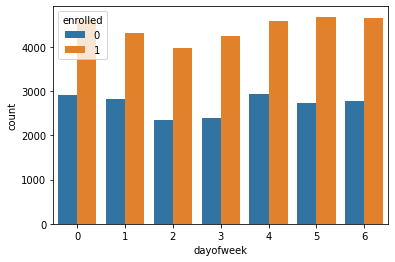

In [28]:
sns.countplot(x='dayofweek', data=df_app, hue='enrolled')

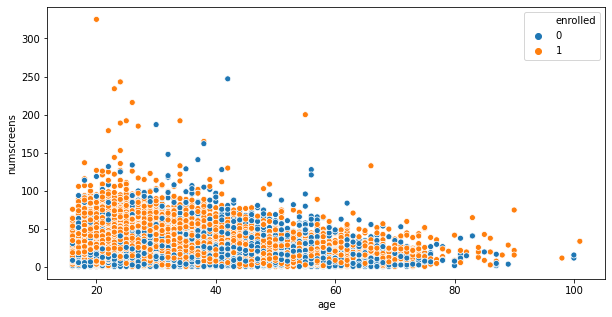

In [29]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='age', y='numscreens', data=df_app, hue='enrolled')

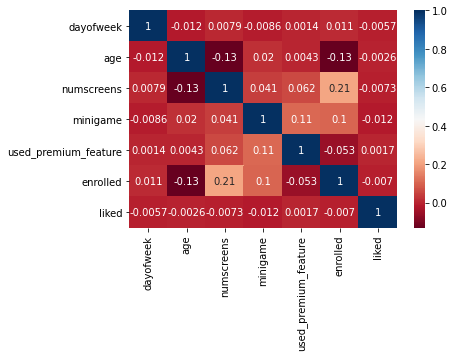

In [30]:
df_corr = df_app.drop('user', axis=1).corr()
sns.heatmap(df_corr, cmap='RdBu', annot=True)

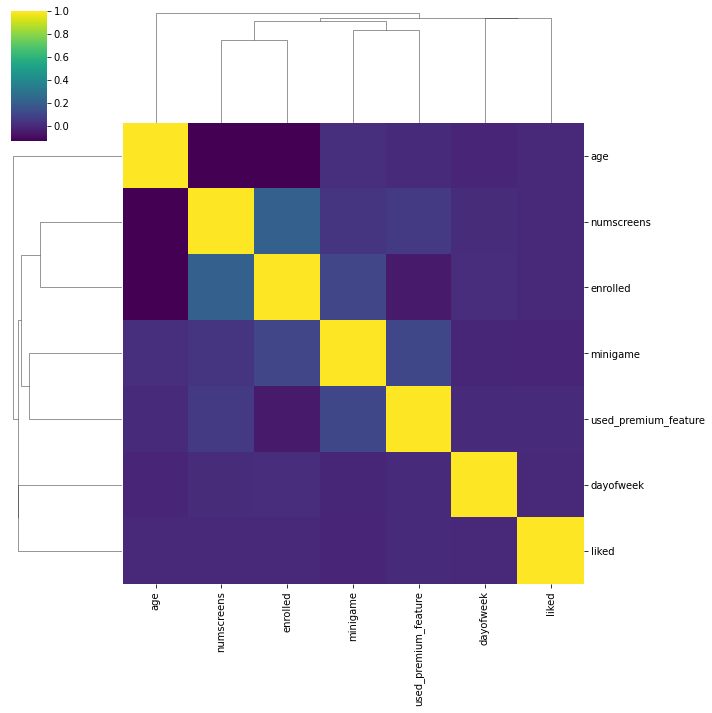

In [31]:
sns.clustermap(df_corr, cmap='viridis')

In [32]:
df_app['first_open'] = pd.to_datetime(df_app['first_open'])
df_app['enrolled_date'] = pd.to_datetime(df_app['enrolled_date'])

In [33]:
df_app['lapse'] = df_app['enrolled_date'] - df_app['first_open']

In [34]:
df_app['lapse']

0                   NaT
1                   NaT
2                   NaT
3       00:03:03.159000
4       00:05:49.180000
              ...      
49995   00:01:35.004000
49996               NaT
49997               NaT
49998   00:02:34.421000
49999               NaT
Name: lapse, Length: 50000, dtype: timedelta64[ns]

In [35]:
df_app['lapse'] = df_app['lapse'].apply(lambda x: x.total_seconds()/(60*60))

In [36]:
df_app['lapse']

0             NaN
1             NaN
2             NaN
3        0.050877
4        0.096994
           ...   
49995    0.026390
49996         NaN
49997         NaN
49998    0.042895
49999         NaN
Name: lapse, Length: 50000, dtype: float64

In [37]:
df_app['hour'] = df_app['hour'].apply(lambda x: x.split(':')[0]).astype(int)

In [38]:
df_app.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,lapse
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.050877
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.096994


In [39]:
df_corr = df_app.drop(['user','lapse'], axis=1).corr()

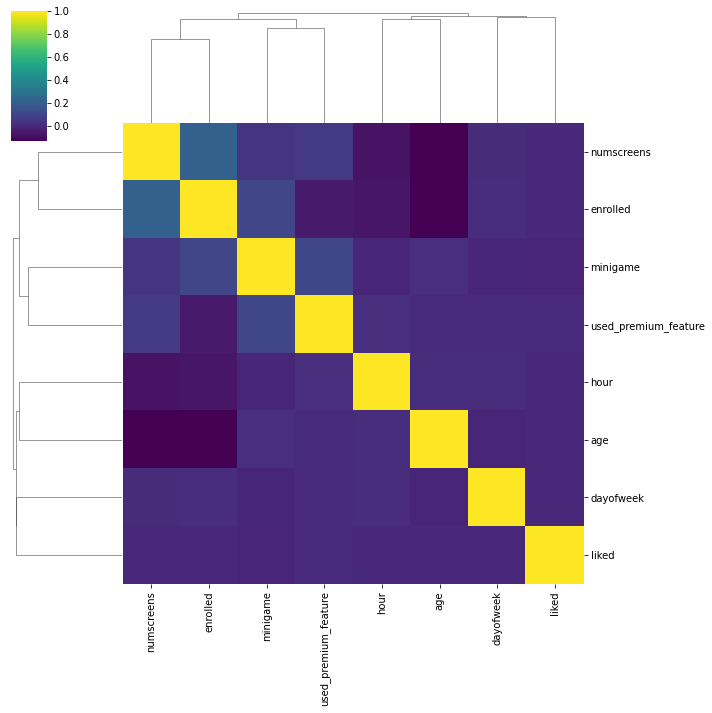

In [40]:
sns.clustermap(df_corr, cmap='viridis')

In [41]:
df_app.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
lapse                          float64
dtype: object

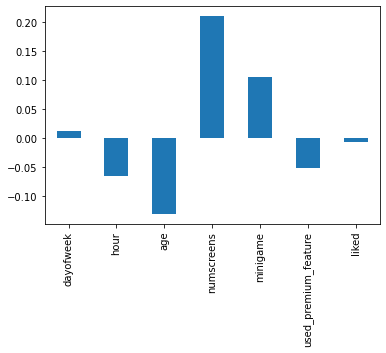

In [42]:
df_corr['enrolled'].drop('enrolled').plot(kind='bar')

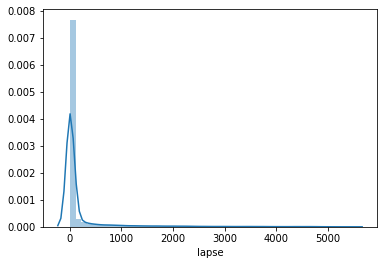

In [43]:
sns.distplot(df_app['lapse'], bins=50)

In [44]:
first_100h=df_app[df_app['lapse']<100]

In [45]:
max(first_100h['lapse'])

99.94404472222222

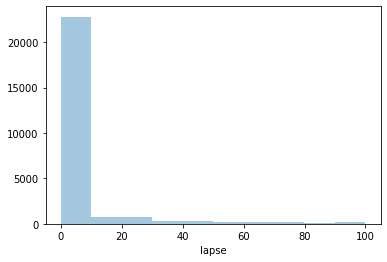

In [46]:
sns.distplot(first_100h['lapse'], bins=10, kde=False)

In [47]:
df_app.loc[df_app['lapse']>48, 'enrolled'] = 0
df_app[df_app['lapse']>48]['enrolled']

8        0
13       0
15       0
17       0
27       0
        ..
49951    0
49952    0
49982    0
49983    0
49988    0
Name: enrolled, Length: 6287, dtype: int64

In [48]:
df_app.drop(columns=['lapse', 'first_open', 'enrolled_date'], inplace=True)

In [49]:
df_app.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [50]:
top_screens = pd.read_csv('top_screens.csv').top_screens.values

In [51]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [52]:
top_screens = list(map(lambda x: x.strip(),top_screens))

In [53]:
df_app['screen_list'] = df_app['screen_list'].apply(lambda x: x.split(','))

In [54]:
'''
for screen in top_screens:
    in_bool = [screen in df_app['screen_list'][i] for i in df_app.index]
    df_app[screen]=[int(i) for i in in_bool]
'''

"\nfor screen in top_screens:\n    in_bool = [screen in df_app['screen_list'][i] for i in df_app.index]\n    df_app[screen]=[int(i) for i in in_bool]\n"

In [55]:
for screen in top_screens:
    df_app[screen] = 0
    for i in df_app.index:
        if screen in df_app['screen_list'][i]:
            df_app.loc[i, screen] = 1
            df_app.loc[i, 'screen_list'].remove(screen)
        else:
            pass       

In [56]:
df_app.loc[:,'idscreen':]

,idscreen,Credit3Dashboard,Loan3,CC1Category,Splash,Loan,CC1,RewardsContainer,Credit3,Credit1,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
49996,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
#df_app.info()

In [58]:
df_app['Other'] = df_app['screen_list'].apply(lambda x: len(x))

In [59]:
df_app.drop('screen_list', axis=1, inplace=True)

In [60]:
df_app

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,7
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
49998,324905,6,12,27,26,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,13


In [61]:
saving_screens = sorted([screen for screen in top_screens if 'Saving' in screen])
loan_screens = sorted([screen for screen in top_screens if 'Loan' in screen])
credit_screens = sorted([screen for screen in top_screens if 'Credit' in screen])
CC_screens = sorted([screen for screen in top_screens if 'CC' in screen])

In [62]:
saving_screens = ['Saving1', 'Saving2', 'Saving2Amount', 'Saving4', 'Saving5', 'Saving6'
                  , 'Saving7', 'Saving8', 'Saving9', 'Saving10']

In [63]:
df_app['SavingsCount'] = df_app[saving_screens].sum(axis=1)
df_app['LoanCount'] = df_app[loan_screens].sum(axis=1)
df_app['CreditCount'] = df_app[credit_screens].sum(axis=1)
df_app['CCCount'] = df_app[credit_screens].sum(axis=1)

In [64]:
df_app.drop(columns=saving_screens+loan_screens+credit_screens+CC_screens, inplace=True)

In [65]:
df_app.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingsCount', 'LoanCount', 'CreditCount', 'CCCount'],
      dtype='object')

In [66]:
df_app.to_csv('appdata10_engineered.csv', index=False)

In [67]:
pd.read_csv('appdata10_engineered.csv')

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,LoanCount,CreditCount,CCCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,1,0,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,1,0,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,1,3,3
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,0,0,0,7,0,0,2,2
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
49997,302367,2,22,39,25,0,0,0,0,1,...,0,0,0,0,0,6,0,0,0,0
49998,324905,6,12,27,26,0,0,1,0,1,...,0,0,0,0,0,13,0,0,0,0


<Figure size 864x720 with 0 Axes>

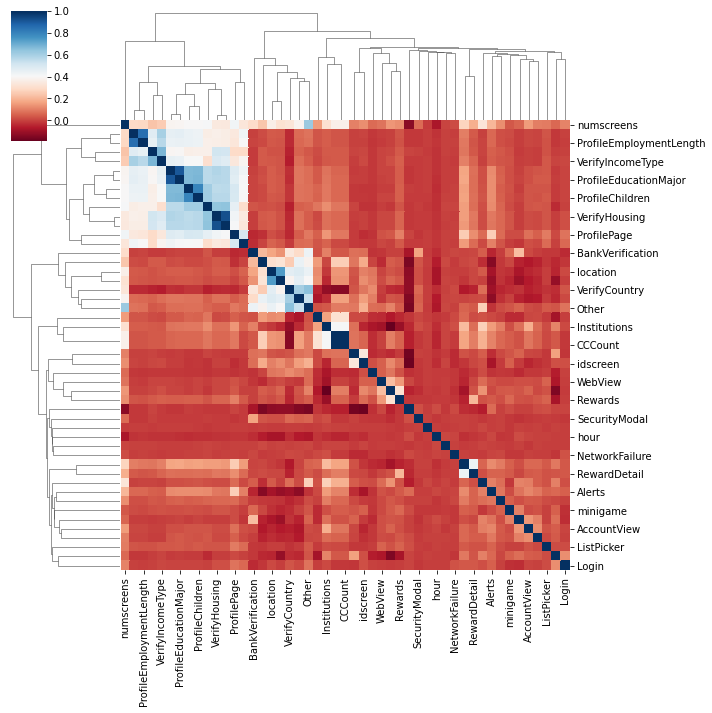

In [68]:
df_corr = df_app.drop('user', axis=1).corr()
plt.figure(figsize=(12,10))
sns.clustermap(df_corr, cmap='RdBu')

## Data Preprocessing

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [69]:
X = df_app.drop('enrolled', axis=1)
y = df_app['enrolled']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [75]:
train_user = X_train['user']
X_train = X_train.drop('user', axis=1)
test_user = X_test['user']
X_test = X_test.drop('user', axis=1)

In [78]:
train_user

20330    315793
17532    103347
45819    373340
34807    324006
31888    248759
          ...  
21243    312924
45891    291893
42613    221546
43567    116320
2732     259677
Name: user, Length: 40000, dtype: int64

In [79]:
scaler = StandardScaler()

In [83]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [87]:
X_train_scaled.columns = X_train.columns
X_test_scaled.columns = X_test.columns
X_train_scaled.index = X_train.index
X_test_scaled.index = X_test.index

In [88]:
X_train_scaled

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,LoanCount,CreditCount,CCCount
20330,-0.504961,1.000837,0.025525,-1.026726,-0.346830,2.186018,2.246319,-1.039218,-0.643682,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.903446,-0.259899,0.625239,-0.765317,-0.765317
17532,-0.997389,1.135280,-0.898034,1.328829,2.883254,-0.457453,-0.445173,0.962262,1.553561,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,2.071152,-0.259899,0.625239,0.063554,0.063554
45819,-1.489818,-1.150250,-0.528611,4.066366,2.883254,-0.457453,-0.445173,-1.039218,1.553561,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,0.989480,-0.259899,0.625239,0.892425,0.892425
34807,0.479896,0.059736,-0.620967,0.182883,2.883254,-0.457453,-0.445173,0.962262,-0.643682,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,0.989480,-0.259899,0.625239,-0.765317,-0.765317
31888,-0.012532,0.463065,1.687932,-0.644744,-0.346830,-0.457453,-0.445173,0.962262,-0.643682,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.903446,-0.259899,-1.314689,0.892425,0.892425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,0.972325,1.404166,-1.175102,-0.963062,-0.346830,-0.457453,-0.445173,-1.039218,-0.643682,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.173864,-0.259899,-1.314689,-0.765317,-0.765317
45891,-1.489818,0.328622,-0.898034,-1.090390,2.883254,2.186018,-0.445173,-1.039218,-0.643682,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.444282,-0.259899,0.625239,0.063554,0.063554
42613,-0.012532,-0.881364,-0.620967,1.392493,-0.346830,-0.457453,-0.445173,-1.039218,1.553561,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.633028,4.011238,-1.314689,-0.765317,-0.765317
43567,0.479896,0.059736,-0.436255,-1.090390,2.883254,-0.457453,2.246319,-1.039218,-0.643682,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.173864,-0.259899,-1.314689,-0.765317,-0.765317


## Machine Learning model

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [111]:
model = LogisticRegression(random_state=0, penalty='l1', solver='liblinear')

In [112]:
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
y_pred = model.predict(X_test)

In [124]:
print('confusion matrix: \n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion matrix: 
 [[4881  206]
 [3945  968]]
              precision    recall  f1-score   support

           0       0.55      0.96      0.70      5087
           1       0.82      0.20      0.32      4913

    accuracy                           0.58     10000
   macro avg       0.69      0.58      0.51     10000
weighted avg       0.69      0.58      0.51     10000



## Cross validation

In [125]:
from sklearn.model_selection import cross_val_score

In [129]:
scores = cross_val_score(model, X_train, y=y_train, cv=10)

In [130]:
scores

array([0.77125, 0.7695 , 0.77225, 0.7655 , 0.7625 , 0.763  , 0.76475,
       0.76625, 0.773  , 0.75825])

In [139]:
results = pd.concat([test_user, y_test], axis=1)
results.columns = ['user', 'enrolled']
results['prediction'] = y_pred

In [148]:
results.reset_index(drop=True, inplace=True)
results

,user,enrolled,prediction
0,239786,1,0
1,279644,1,0
2,98290,0,0
3,170150,1,1
4,237568,1,0
...,...,...,...
9995,143036,1,0
9996,91158,1,0
9997,248318,0,0
9998,142418,1,1
